### 시간대가 버스의 배차 간격에 영향을 미치는지 분석

In [2]:
import os
import pandas as pd

In [3]:
route_info = pd.read_csv('./route_info.csv')
route_info

,Unnamed: 0,routeid,routeno,startnodenm,startvehicletime,endnodenm,endvehicletime,intervaltime
0,0,CAB285000006,11,두정우성아파트,605,두정우남아파트,2230,10
1,1,CAB285000007,11,두정우남아파트,610,두정한성아파트,2230,10
2,2,CAB285000008,12,방아다리공원,604,부영아파트,2230,7
3,3,CAB285000009,12,부영아파트,605,방아다리공원,2222,7
4,4,CAB285000010,13,단대병원,600,천안아산역,2230,11
5,5,CAB285000011,13,천안아산역,605,단대병원,2245,11
6,6,CAB285000012,14,방아다리공원,600,백석대학교(운동장),2220,10
7,7,CAB285000013,14,백석대학교(운동장),610,방아다리공원,2215,10
8,8,CAB285000024,24,각원사,610,동우아파트,2230,20
9,9,CAB285000025,24,동우아파트,620,각원사,2225,20


In [4]:
bus_timegap_file_list = os.listdir('./mine')
print(bus_timegap_file_list)

['CAB285000006.csv', 'CAB285000007.csv', 'CAB285000008.csv', 'CAB285000009.csv', 'CAB285000010.csv', 'CAB285000011.csv', 'CAB285000012.csv', 'CAB285000013.csv', 'CAB285000024.csv', 'CAB285000025.csv', 'CAB285000293.csv', 'CAB285000294.csv']


In [5]:
interval_times = route_info['intervaltime']

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40, 40))

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

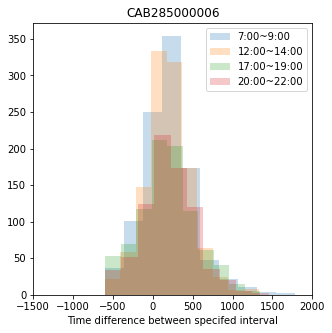

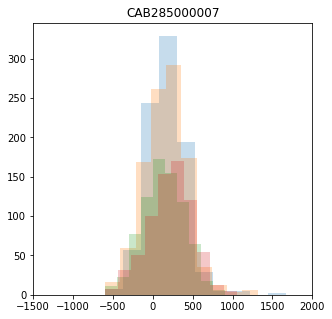

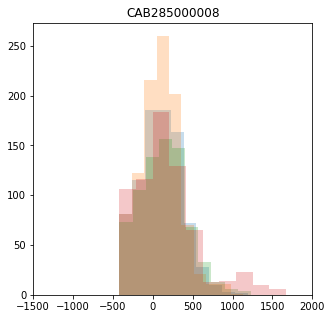

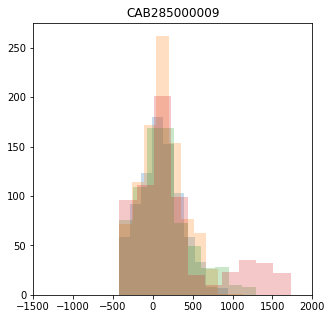

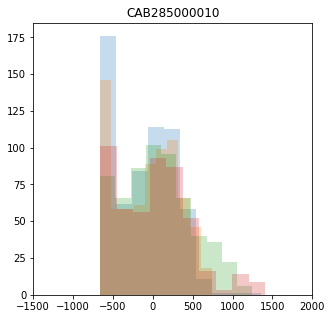

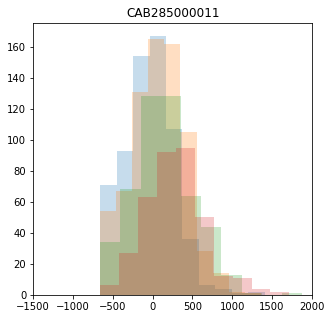

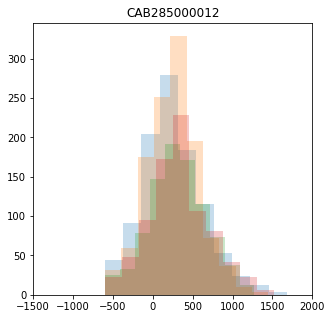

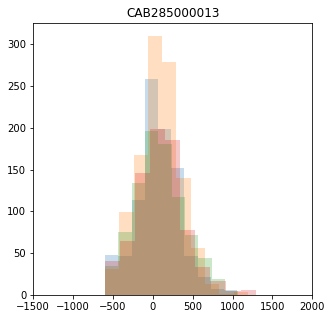

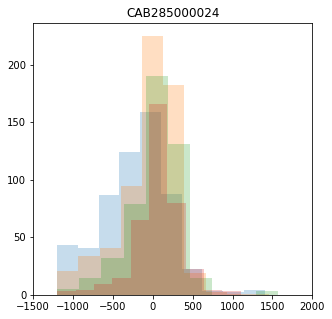

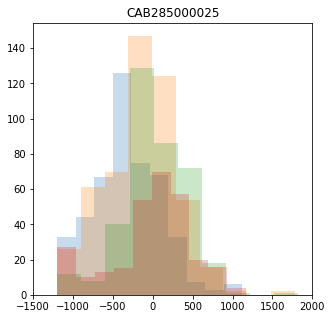

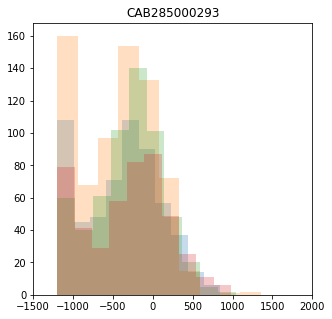

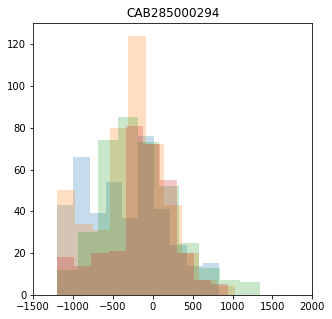

In [19]:
for i, file in enumerate(bus_timegap_file_list):
    bus = pd.read_csv('./mine/' + file)
    bus_intervaltime = interval_times[i] # 현재 버스의 배차 간격 추출
    
    bus_interval_comp = list()
    
    for stage in range(4):
        time_gap_str = bus.iloc[stage, 1] # time gap 추출
        time_gap = list(map(int, time_gap_str[1:-1].split(', '))) # str -> int 형 리스트로 변환
        
        for gap in range(len(time_gap)):
            time_gap[gap] -= bus_intervaltime*60
        
        bus_interval_comp.append(time_gap)
       
    plt.subplots(figsize=(5, 5))
    
    plt.hist(bus_interval_comp[0], alpha=0.25)
    plt.hist(bus_interval_comp[1], alpha=0.25)
    plt.hist(bus_interval_comp[2], alpha=0.25)
    plt.hist(bus_interval_comp[3], alpha=0.25)
    
    plt.xticks(np.arange(-1500, 2500, 500))
    
    plt.title(file[:-4])
    
    if i == 0:
        plt.xlabel('Time difference between specifed interval')
        plt.legend(['7:00~9:00', '12:00~14:00', '17:00~19:00', '20:00~22:00']) # 첫번째 그래프에 어느 것이 malignant인지, benign인지 표시
    
#     plt.savefig('./image/analysis_interval_impact_stage'+file+'.png') # 그래프 이미지로 저장
    